In [1]:
import pandas as pd

In [2]:
file_path = "/Users/tapankhaladkar/Big Data Science/HW-5/Breast_Cancer_dataset.csv"

In [3]:
data = pd.read_csv(file_path)

In [4]:
print(data)

      Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately d

In [5]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [16]:
# check for missing values
missing_values = data.isnull().sum()
# summary statistics
data_description = data.describe()

In [14]:
missing_values


Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [15]:
data_description

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


  Columns Outliers Column
0     NaN        0    Age
  Columns Outliers      Column
0     NaN        0         Age
1     NaN      222  Tumor Size
  Columns Outliers                  Column
0     NaN        0                     Age
1     NaN      222              Tumor Size
2     NaN       72  Regional Node Examined
  Columns Outliers                  Column
0     NaN        0                     Age
1     NaN      222              Tumor Size
2     NaN       72  Regional Node Examined
3     NaN      344   Reginol Node Positive
  Columns Outliers                  Column
0     NaN        0                     Age
1     NaN      222              Tumor Size
2     NaN       72  Regional Node Examined
3     NaN      344   Reginol Node Positive
4     NaN       18         Survival Months


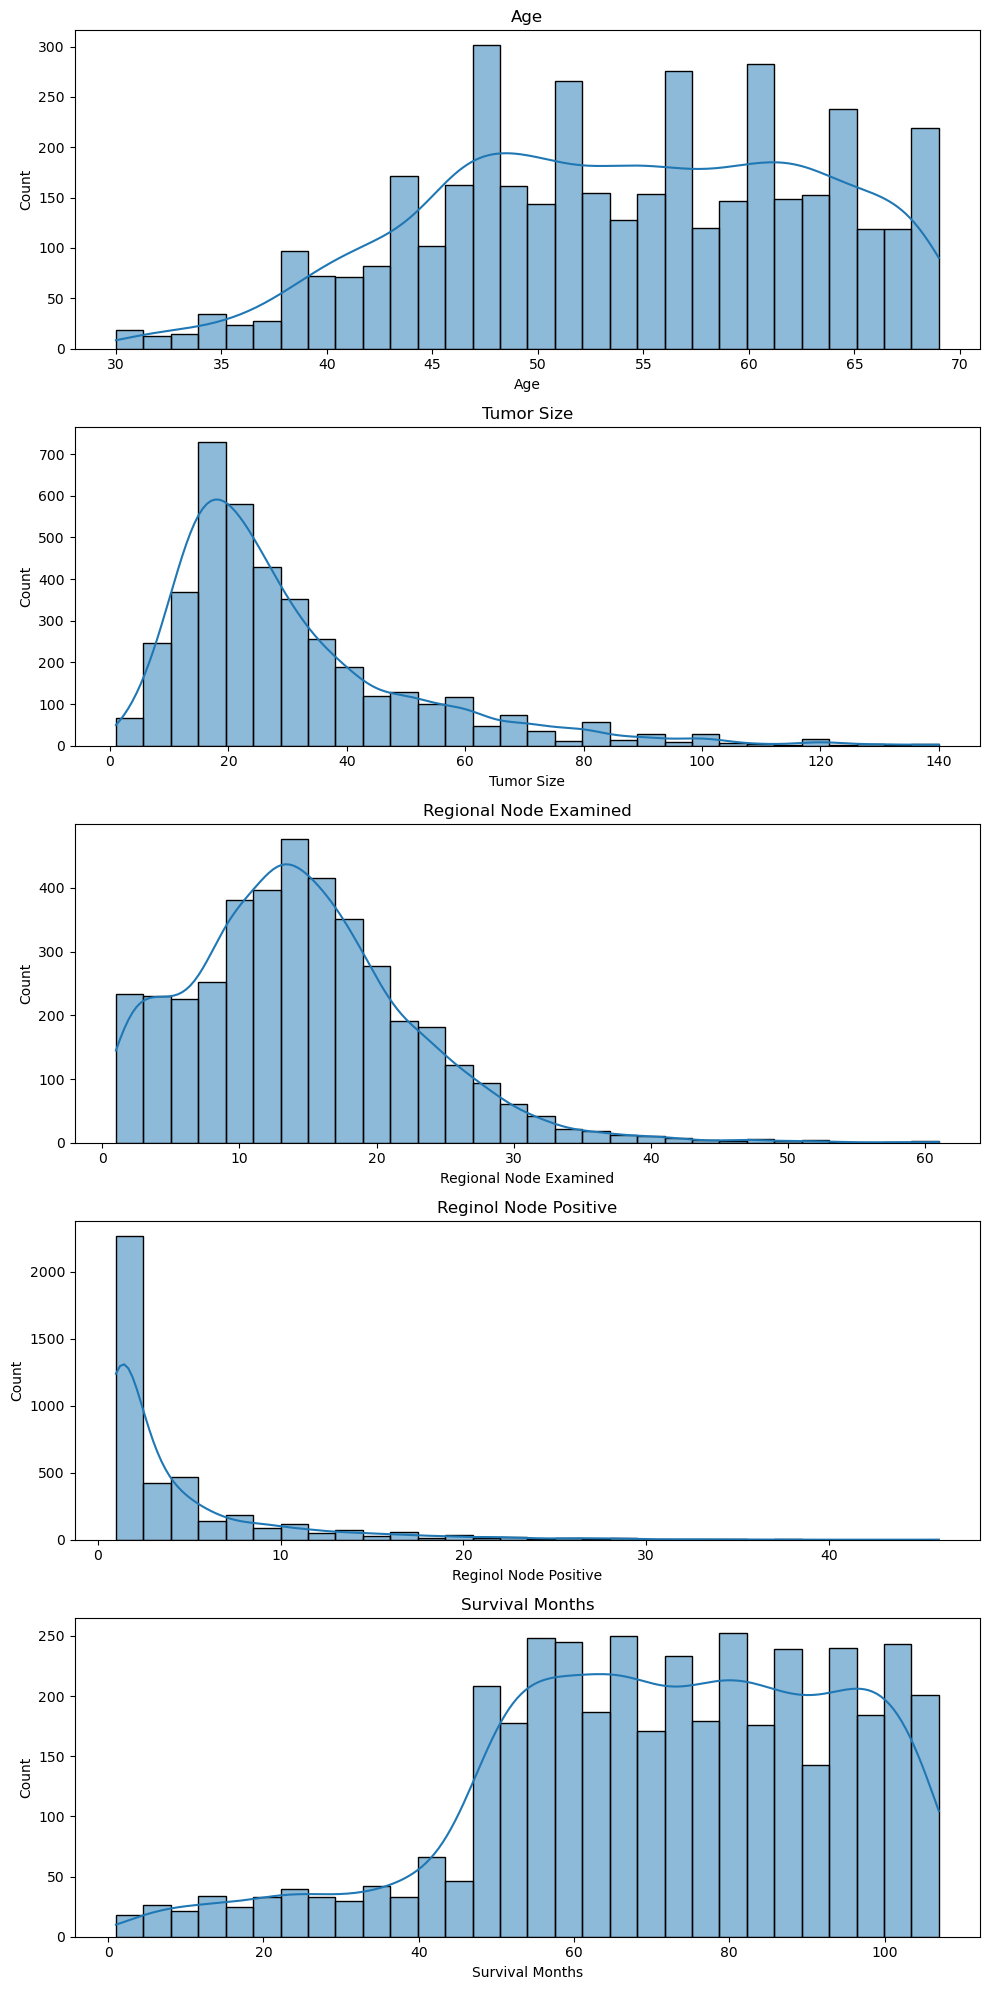

(  Columns Outliers                  Column
 0     NaN        0                     Age
 1     NaN      222              Tumor Size
 2     NaN       72  Regional Node Examined
 3     NaN      344   Reginol Node Positive
 4     NaN       18         Survival Months,
 None)

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identifying numerical columns
numerical_columns = data.select_dtypes(include=['int64','float64']).columns

# Calculating IQR for each numerical column
outliers = pd.DataFrame(columns=['Columns','Outliers'])

for column in numerical_columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3-q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    outliers_count = data.loc[(data[column] < fence_low) | (data[column] > fence_high)].shape[0]
    new_row = pd.DataFrame({'Column': [column], 'Outliers': [outliers_count]})
    outliers = pd.concat([outliers, new_row], ignore_index=True)
    
    print(outliers)
    
    
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(10,20))
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], bins = 30, kde = True, ax = axes[i])
    axes[i].set_title(col)
    
plt.tight_layout()
outliers, plt.show()


In [29]:
outliers

,Columns,Outliers,Column
0,NaN,0,Age
1,NaN,222,Tumor Size
2,NaN,72,Regional Node Examined
3,NaN,344,Reginol Node Positive
4,NaN,18,Survival Months


In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

columns_to_standardize = ['Age', 'Survival Months'] #Normally Distributed
columns_to_normalize = ['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']

transformed_data = data.copy()

# Standardizing the normally distributed columns
transformed_data[columns_to_standardize] = scaler_standard.fit_transform(data[columns_to_standardize])

# Normalizing the skewed distribution columns
transformed_data[columns_to_normalize] = scaler_minmax.fit_transform(data[columns_to_normalize])

transformed_data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,1.565253,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,0.021583,Positive,Positive,0.383333,0.000000,-0.492961,Alive
1,-0.443222,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,0.244604,Positive,Positive,0.216667,0.088889,-0.405695,Alive
2,0.449434,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,0.446043,Positive,Positive,0.216667,0.133333,0.161530,Alive
3,0.449434,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,0.122302,Positive,Positive,0.016667,0.000000,0.554224,Alive
4,-0.777968,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,0.287770,Positive,Positive,0.033333,0.000000,-0.929288,Alive


In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

numerical_data = transformed_data.select_dtypes(include=['int64','float64']) #selecting only numerical columns for PCA
principal_components = pca.fit_transform(numerical_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])

print(pca_df)

           PC1       PC2
0     1.448618 -0.771859
1    -0.021999  0.601062
2     0.201540 -0.428502
3    -0.079883 -0.712462
4     0.115001  1.205750
...        ...       ...
4019  1.320801  0.040216
4020  0.231406 -0.087879
4021  1.169898 -1.045843
4022  0.293031 -0.340755
4023 -1.516684 -0.246731

[4024 rows x 2 columns]


In [39]:
pca_df.head

<bound method NDFrame.head of            PC1       PC2
0     1.448618 -0.771859
1    -0.021999  0.601062
2     0.201540 -0.428502
3    -0.079883 -0.712462
4     0.115001  1.205750
...        ...       ...
4019  1.320801  0.040216
4020  0.231406 -0.087879
4021  1.169898 -1.045843
4022  0.293031 -0.340755
4023 -1.516684 -0.246731

[4024 rows x 2 columns]>

In [42]:
from sklearn.preprocessing import LabelEncoder

encoded_data = transformed_data.copy()

label_encoder = LabelEncoder()

for column in encoded_data.columns:
    if encoded_data[column].dtype == 'object':
        encoded_data[column] = label_encoder.fit_transform(encoded_data[column])
        
encoded_data.head()
    

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,1.565253,2,1,0,0,0,1,3,1,0.021583,1,1,0.383333,0.000000,-0.492961,0
1,-0.443222,2,1,1,1,2,0,2,1,0.244604,1,1,0.216667,0.088889,-0.405695,0
2,0.449434,2,0,2,2,4,0,2,1,0.446043,1,1,0.216667,0.133333,0.161530,0
3,0.449434,2,1,0,0,0,1,3,1,0.122302,1,1,0.016667,0.000000,0.554224,0
4,-0.777968,2,1,1,0,1,1,3,1,0.287770,1,1,0.033333,0.000000,-0.929288,0


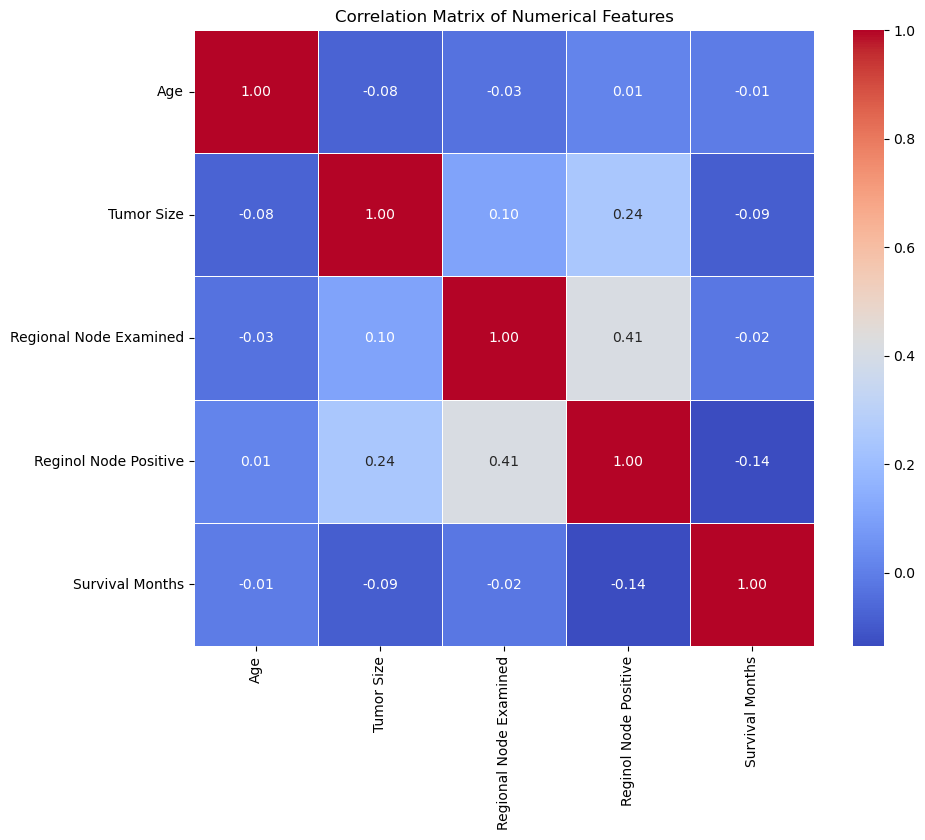

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

correlation_matrix = transformed_data[numerical_columns].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [46]:
transformed_data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [47]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [49]:
transformed_data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,1.565253,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,0.021583,Positive,Positive,0.383333,0.000000,-0.492961,Alive
1,-0.443222,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,0.244604,Positive,Positive,0.216667,0.088889,-0.405695,Alive
2,0.449434,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,0.446043,Positive,Positive,0.216667,0.133333,0.161530,Alive
3,0.449434,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,0.122302,Positive,Positive,0.016667,0.000000,0.554224,Alive
4,-0.777968,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,0.287770,Positive,Positive,0.033333,0.000000,-0.929288,Alive


In [50]:
outliers

,Columns,Outliers,Column
0,NaN,0,Age
1,NaN,222,Tumor Size
2,NaN,72,Regional Node Examined
3,NaN,344,Reginol Node Positive
4,NaN,18,Survival Months


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [52]:
!pip list

Package                       Version
----------------------------- ------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites 

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Accuracy: 0.91


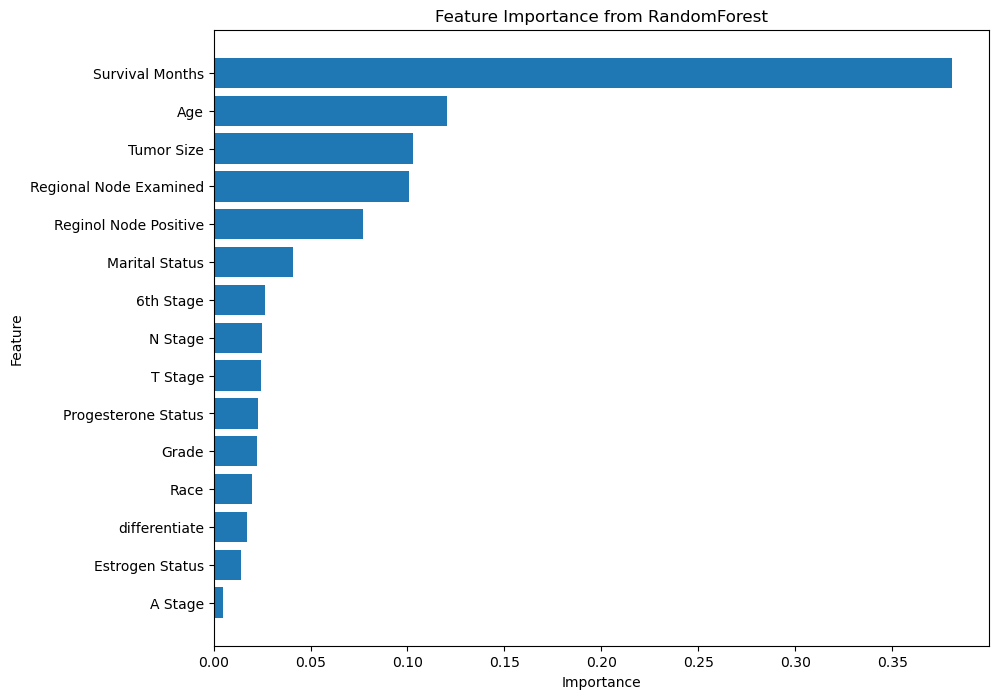

In [60]:
transformed_data.columns = transformed_data.columns.str.strip()
label_encoders = {}
categorical_columns = transformed_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

X = data.drop('Status', axis=1)  # 'Status' is the target variable
y = data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Feature importance
feature_importance = rf_classifier.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.show()

In [61]:
# Save the transformed_data DataFrame to a CSV file
transformed_data.to_csv('/Users/tapankhaladkar/Big Data Science/HW-5/transformed_data.csv', index=False)


In [2]:
import pandas as pd

In [3]:
file_path = '/Users/tapankhaladkar/Big Data Science/HW-5/transformed_data.csv'
data = pd.read_csv(file_path)

In [4]:
data.head(), data.describe(include='all')


(        Age   Race Marital Status T Stage N Stage 6th Stage  \
 0  1.565253  White        Married      T1      N1       IIA   
 1 -0.443222  White        Married      T2      N2      IIIA   
 2  0.449434  White       Divorced      T3      N3      IIIC   
 3  0.449434  White        Married      T1      N1       IIA   
 4 -0.777968  White        Married      T2      N1       IIB   
 
                differentiate Grade   A Stage  Tumor Size Estrogen Status  \
 0      Poorly differentiated     3  Regional    0.021583        Positive   
 1  Moderately differentiated     2  Regional    0.244604        Positive   
 2  Moderately differentiated     2  Regional    0.446043        Positive   
 3      Poorly differentiated     3  Regional    0.122302        Positive   
 4      Poorly differentiated     3  Regional    0.287770        Positive   
 
   Progesterone Status  Regional Node Examined  Reginol Node Positive  \
 0            Positive                0.383333               0.000000   
 1  

# KNN

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data.drop('Status', axis=1)
y = data['Status']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report


(0.884472049689441,
 array([[671,  14],
        [ 79,  41]]),
 '              precision    recall  f1-score   support\n\n           0       0.89      0.98      0.94       685\n           1       0.75      0.34      0.47       120\n\n    accuracy                           0.88       805\n   macro avg       0.82      0.66      0.70       805\nweighted avg       0.87      0.88      0.87       805\n')

# # Naive Bayes


In [7]:
from sklearn.naive_bayes import GaussianNB

# Define the Gaussian Naive Bayes model
nb = GaussianNB()

# Train the Naive Bayes model
nb.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred_nb = nb.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
class_report_nb = classification_report(y_test, y_pred_nb)

accuracy_nb, conf_matrix_nb, class_report_nb


(0.8397515527950311,
 array([[617,  68],
        [ 61,  59]]),
 '              precision    recall  f1-score   support\n\n           0       0.91      0.90      0.91       685\n           1       0.46      0.49      0.48       120\n\n    accuracy                           0.84       805\n   macro avg       0.69      0.70      0.69       805\nweighted avg       0.84      0.84      0.84       805\n')

# Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree model using the entropy criterion
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the Decision Tree model
dt.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred_dt = dt.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

accuracy_dt, conf_matrix_dt, class_report_dt


(0.8608695652173913,
 array([[626,  59],
        [ 53,  67]]),
 '              precision    recall  f1-score   support\n\n           0       0.92      0.91      0.92       685\n           1       0.53      0.56      0.54       120\n\n    accuracy                           0.86       805\n   macro avg       0.73      0.74      0.73       805\nweighted avg       0.86      0.86      0.86       805\n')

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model
rf.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, conf_matrix_rf, class_report_rf


(0.9130434782608695,
 array([[673,  12],
        [ 58,  62]]),
 '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95       685\n           1       0.84      0.52      0.64       120\n\n    accuracy                           0.91       805\n   macro avg       0.88      0.75      0.79       805\nweighted avg       0.91      0.91      0.90       805\n')

# Gradient Boosting

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Gradient Boosting model
gb.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred_gb = gb.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

accuracy_gb, conf_matrix_gb, class_report_gb


(0.915527950310559,
 array([[674,  11],
        [ 57,  63]]),
 '              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95       685\n           1       0.85      0.53      0.65       120\n\n    accuracy                           0.92       805\n   macro avg       0.89      0.75      0.80       805\nweighted avg       0.91      0.92      0.91       805\n')

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 5, 10],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # The minimum number of samples required to be at a leaf node
}

# Perform RandomizedSearchCV for Random Forest
rf_random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=10,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

rf_random_search.fit(X_train_scaled, y_train)

# Perform RandomizedSearchCV for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=gb_param_grid,
    n_iter=10,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

gb_random_search.fit(X_train_scaled, y_train)

# Collecting the results
rf_best_params = rf_random_search.best_params_
rf_best_score = rf_random_search.best_score_
rf_best_estimator = rf_random_search.best_estimator_

gb_best_params = gb_random_search.best_params_
gb_best_score = gb_random_search.best_score_
gb_best_estimator = gb_random_search.best_estimator_

(rf_best_params, rf_best_score, gb_best_params, gb_best_score)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'n_estimators': 50,
  'min_samples_split': 10,
  'min_samples_leaf': 1,
  'max_depth': None,
  'bootstrap': True},
 0.9018300281096954,
 {'n_estimators': 100,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_depth': 3,
  'learning_rate': 0.1},
 0.8999676400413434)

In [18]:
rf_best_params = rf_random_search.best_params_
rf_best_score = rf_random_search.best_score_
rf_best_estimator = rf_random_search.best_estimator_

gb_best_params = gb_random_search.best_params_
gb_best_score = gb_random_search.best_score_
gb_best_estimator = gb_random_search.best_estimator_